## 멕시코풍 프랜차이즈 Chipotle의 주문 데이터 분석하기
---
### <Step1. 탐색> : 데이터의 기초 정보 살펴보기
> - Chipotle 데이터셋의 기본 정보
> - Chipotle 데이터셋의 행과 열, 데이터
> - Chipotle 데이터셋의 수치적 특징 파악

In [1]:
import pandas as pd

In [2]:
# 데이터를 불러온 뒤, 불러온 데이터 구성 정보를 출력하는 코드
# read_csv 함수로 데이터를 Dataframe 형태로
# csv(comma separated value)는 쉼표 기준,
# tsv(tab separated value)는 tab 기준으로 항목을 구분하여 저장한 데이터
file_path = '../data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep='\t')

In [3]:
# 데이터 프레임의 행과 열의 정보 출력 / print()는 생략 가능
print(chipo.shape)

(4622, 5)


In [4]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [5]:
# chipo라는 Dataframe에서 순서대로 10개의 row 데이터를 출력
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [6]:
# columns() 함수로 컬럼의 정보를 보여줌
# order_id : 주문 번호
# quantity : 주문 수량
# item_name : 주문한 상품명
# choice _description : 주문 아이템의 상세 선택 옵션
#item_price : 주문한 상품가격
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [7]:
# index는 인덱스 정보
chipo.index

RangeIndex(start=0, stop=4622, step=1)

---
### <Step2. 인사이트의 발견> : 탐색과 시각화
> - 가장 많이 주문한 item
> - item당 주문 개수와 총량 구하기
> - 시각화로 분석 결과 살펴보기

In [8]:
# Chipotle 데이터셋의 수치적 특징 파악
# describe() 함수로 요약 통계량 출력하기(수치적 계산이 가능한 피처만 출력)
# chipo dataframe에서 수치형 피처들의 요약 통계량을 확인
# 데이터의 count(수), mean(평균), std(표준편차), min(최소값),
# 25%(1사분위수), 50%(2사분위수), 75%(3사분위수), max(최대값)
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [9]:
chipo.mean()

C:\Users\YJ\AppData\Local\Temp\ipykernel_11320\3264524649.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  chipo.mean()


order_id    927.254868
quantity      1.075725
dtype: float64

In [10]:
# astype() 함수로 order_id의 데이터 타입을 String으로 변경
# 수치형이 아니므로 숫자의 의미를 가지지 않아 결과에서 제외됨
chipo['order_id'] = chipo['order_id'].astype(str)
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


---
### unique() 함수로 범주형 피처의 개수 출력하기

In [11]:
# unique() 함수는 열(시리즈)의 중복값을 제거한 고유값만 출력
# order_id와 item_name의 피처 형태 특징 - 범주형 피처
# len(chipo['피처명'].unique())는 열(시리즈)의 고유값 수
print(chipo['order_id'].unique())
print(len(chipo['order_id'].unique()))

['1' '2' '3' ... '1832' '1833' '1834']
1834


In [12]:
print(chipo['item_name'].unique())
print(len(chipo['item_name'].unique())) # 길이

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Chips and Tomatillo Green Chili Salsa' 'Barbacoa Bowl'
 'Chips' 'Chicken Salad Bowl' 'Steak Bowl' 'Barbacoa Soft Tacos'
 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted Chili-Corn Salsa'
 'Chips and Roasted Chili Corn Salsa' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl'
 '6 Pack Soft Drink' 'Chips and Tomatillo-Red Chili Salsa' 'Bowl'
 'Burrito' 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Chips and Mild Fresh Tomato Salsa' 'Veggie Soft Tacos'
 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl' 'Salad' 'Veggie Cris

---
### [가장 많이 주문한 item]

In [13]:
# Dataframe['column'] 형태에 value_counts() 함수 적용

# 가장 많이 주문한 item:top10을 출력
# value_counts() 각 원소의 빈도수 출력, 시리즈 객체에만 적용
# Series(시리즈)는 복수의 행(row)으로 이루어진 하나의 열(column) 구조
chipo['item_name'].value_counts()[5:10] # 상위 5위에서 10위까지

Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [14]:
chipo['item_name'].value_counts()[:10] # 상위 10개

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

---
### [item당 주문 개수]

In [15]:
# groupby() 함수는 데이터 프레임에서 특정 피처를 기준으로
# 그룹을 생성하여, 이를 통해 그룹별 연산을 적용

print("[COUNT]")
print(chipo.groupby('item_name')['quantity'].count()[:10])
print()

print("[SUM]")
# item_name으로 그룹 지어진 피처의 quantity의 합(sum)을 구함
print(chipo.groupby('item_name')['quantity'].sum()[:10])

[COUNT]
item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: quantity, dtype: int64

[SUM]
item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64


In [16]:
chipo.groupby('item_name')['item_price'].sum()[:10]

item_name
6 Pack Soft Drink        $6.49 $6.49 $6.49 $6.49 $6.49 $6.49 $6.49 $6.4...
Barbacoa Bowl            $11.75 $11.75 $9.25 $8.99 $9.25 $11.75 $9.25 $...
Barbacoa Burrito         $8.99 $9.25 $9.25 $11.75 $11.75 $9.25 $8.99 $1...
Barbacoa Crispy Tacos    $11.75 $9.25 $11.48 $11.75 $9.25 $9.25 $8.99 $...
Barbacoa Salad Bowl      $11.89 $11.89 $9.39 $9.39 $9.39 $11.89 $11.89 ...
Barbacoa Soft Tacos      $9.25 $9.25 $8.99 $9.25 $9.25 $11.75 $11.75 $9...
Bottled Water            $1.09 $1.09 $1.09 $1.50 $1.50 $1.50 $3.00 $1.5...
Bowl                                                         $22.20 $7.40 
Burrito                               $7.40 $7.40 $7.40 $7.40 $7.40 $7.40 
Canned Soda              $2.18 $1.09 $2.18 $1.09 $1.09 $1.09 $1.09 $2.1...
Name: item_price, dtype: object

---
### <Step3. 데이터 전처리> : 전처리 함수 사용하기
> - apply()와 lambda를 이용해 데이터 전처리하기

In [17]:
print("[ITEM_PRICE]")
print(chipo['item_price'])
print()

print("[ITEM_PRICE_LAMBDA]")
# column 단위 데이터에 apply 함수로 전처리를 적용

# apply() 함수는 시리즈 단위의 연산을 처리하는 기능을 수행하여
# sum()이나 mean()과 같이 연산이 정의된 함수를 파라미터로 받음

# lambda 뒤에 나오는 인수는 함수에서 사용될 변수 x를 정의하며,
# 변수를 실수형으로 변환하는 float 함수에 적용시킨 결과를 x에 다시 대입

# lambda 함수는 문자열 데이터에서 첫번째 문자열을 제거한 뒤
# 1번째부터 나머지 문자열(숫자)만을 수치형(float, 실수형)으로 바꿔주는 코드

# => item_price 값을 배열 1번째부터 float 타입으로 출력

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.groupby('item_name')['item_price'].sum()[:10]

[ITEM_PRICE]
0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

[ITEM_PRICE_LAMBDA]


item_name
6 Pack Soft Drink        356.95
Barbacoa Bowl            672.36
Barbacoa Burrito         894.75
Barbacoa Crispy Tacos    120.21
Barbacoa Salad Bowl      106.40
Barbacoa Soft Tacos      250.46
Bottled Water            302.56
Bowl                      29.60
Burrito                   44.40
Canned Soda              137.34
Name: item_price, dtype: float64

---
### [시각화로 분석 결과 살펴보기]
> - 지금까지의 분석 결과를 간단한 시각화로 표현
> - 아이템 별 주문의 총량을 막대 그래프로 시각화

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
# tolist() 함수는 시리즈를 리스트로 변환해줌
item_quantity = chipo.groupby('item_name')['quantity'].sum() 
item_name_list = item_quantity.index.tolist() # 그래프의 x 좌표값
order_cnt = item_quantity.values.tolist() # 그래프의 y 좌표값

print(len(item_quantity))
print(len(item_name_list))

50
50


In [20]:
item_quantity

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [21]:
item_name_list

['6 Pack Soft Drink',
 'Barbacoa Bowl',
 'Barbacoa Burrito',
 'Barbacoa Crispy Tacos',
 'Barbacoa Salad Bowl',
 'Barbacoa Soft Tacos',
 'Bottled Water',
 'Bowl',
 'Burrito',
 'Canned Soda',
 'Canned Soft Drink',
 'Carnitas Bowl',
 'Carnitas Burrito',
 'Carnitas Crispy Tacos',
 'Carnitas Salad',
 'Carnitas Salad Bowl',
 'Carnitas Soft Tacos',
 'Chicken Bowl',
 'Chicken Burrito',
 'Chicken Crispy Tacos',
 'Chicken Salad',
 'Chicken Salad Bowl',
 'Chicken Soft Tacos',
 'Chips',
 'Chips and Fresh Tomato Salsa',
 'Chips and Guacamole',
 'Chips and Mild Fresh Tomato Salsa',
 'Chips and Roasted Chili Corn Salsa',
 'Chips and Roasted Chili-Corn Salsa',
 'Chips and Tomatillo Green Chili Salsa',
 'Chips and Tomatillo Red Chili Salsa',
 'Chips and Tomatillo-Green Chili Salsa',
 'Chips and Tomatillo-Red Chili Salsa',
 'Crispy Tacos',
 'Izze',
 'Nantucket Nectar',
 'Salad',
 'Side of Chips',
 'Steak Bowl',
 'Steak Burrito',
 'Steak Crispy Tacos',
 'Steak Salad',
 'Steak Salad Bowl',
 'Steak Soft Ta

In [22]:
order_cnt

[55,
 66,
 91,
 12,
 10,
 25,
 211,
 4,
 6,
 126,
 351,
 71,
 60,
 8,
 1,
 6,
 40,
 761,
 591,
 50,
 9,
 123,
 120,
 230,
 130,
 506,
 1,
 23,
 18,
 45,
 50,
 33,
 25,
 2,
 20,
 29,
 2,
 110,
 221,
 386,
 36,
 4,
 31,
 56,
 87,
 97,
 1,
 6,
 18,
 8]

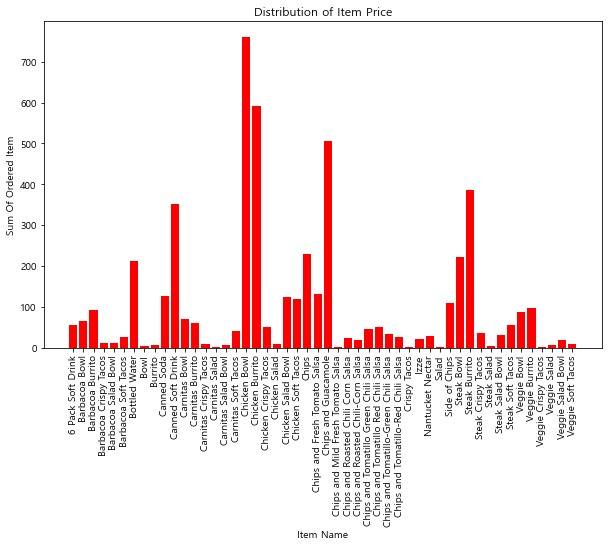

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(item_name_list, order_cnt, align='center', color='red')
plt.ylabel('Sum Of Ordered Item')
plt.xlabel('Item Name')
plt.xticks(rotation=90)
plt.title('Distribution of Item Price')
plt.show()

---
### 1. item당 주문 총량을 막대 그래프로 표현
### 2. item당 주문 개수를 막대 그래프로 표현
### 3. item당 주문 개수(상위 10개만)를 막대 그래프로 표현
---

In [48]:
plt.rc("font", family="Malgun Gothic", size=12) # 그래프에 한글 폰트 입력

orderCount = chipo.groupby('item_name')['quantity'].count()[:10]
orderSum = chipo.groupby('item_name')['quantity'].sum()[:10]

item_name_list_10 = item_quantity.index.tolist()[:10]

print(len(orderCount))
print(orderCount)
print(len(orderSum))
print(orderSum)

10
item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: quantity, dtype: int64
10
item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64


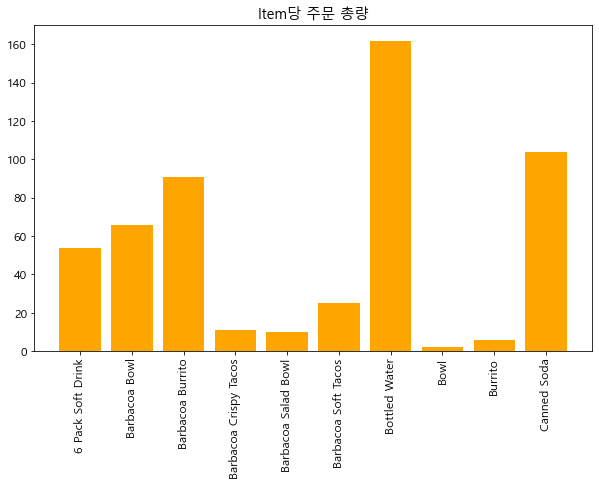

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(item_name_list_10, orderCount, align='center', color='orange')
plt.xticks(rotation=90)
plt.title('Item당 주문 총량')
plt.show()

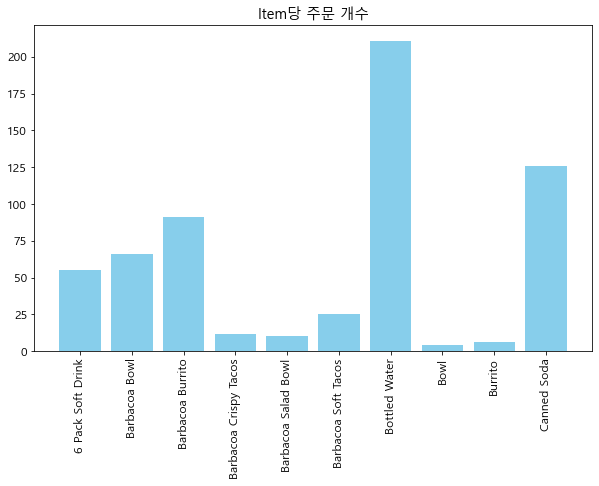

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(item_name_list_10, orderSum, align='center', color='skyblue')
plt.xticks(rotation=90)
plt.title('Item당 주문 개수')
plt.show()

---
### 4. 주문 당 계산 총액 그래프로 출력하기
---

In [51]:
orderPrice = chipo.groupby('order_id')['item_price'].sum()[:10]
orderId = chipo['order_id'].unique()[:10]


print(len(orderPrice))
print(orderPrice)
print(orderId)

10
order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
1002    10.68
1003    13.00
1004    21.96
1005    12.15
1006    71.40
Name: item_price, dtype: float64
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10']


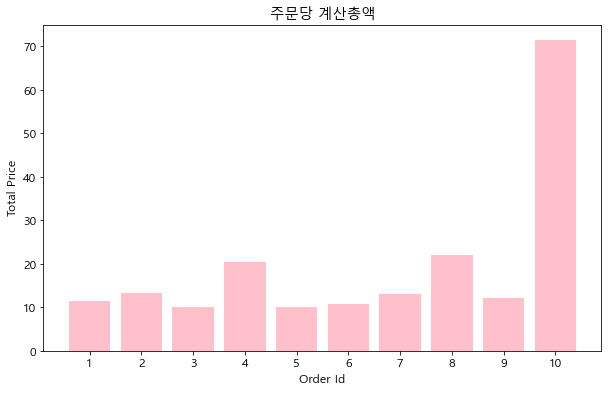

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(orderId, orderPrice, align='center', color='pink')
plt.ylabel('Total Price')
plt.xlabel('Order Id')
plt.title('주문당 계산총액')
plt.show()